<a href="https://colab.research.google.com/github/yiboxu20/MachineLearning/blob/main/Resources/Module2/PCA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
from IPython.display import Image
import numpy.linalg as LA

Populating the interactive namespace from numpy and matplotlib


# Dimensionality Reduction
### High dimensional data

- High-dimensional dataset examples include image/video data,
documentation data, biological data, etc. High-dimensional means lots of features. Eg. each MNIST image has 784 dimensions. Think about image you take in your Phone could have millions pixels.

- Processing big high-dimensional data is often computationally expensive because of the curse of the dimensionality. Many clustering, classification algorithms suffers from it. It is important to reduce the dimension of the data first.

- Many high-dimensional data like images/videos have hidden
low-dimensional structure. i.e., the data points roughly lie in a subspace of much lower dimension.

- It is useful to learn low-dimensional representations for:
 - data visualization

 - more efficient use of resources, e.g., memory storage, time

 - noise removal to improve data quality

 - faster processing by machine learning algorithms

Goal: **learning a mapping** from the high dimensional visible space $\mathbf{x}\in \mathbb{R}^D$, to a low-dimensional latent space $\mathbf{z}\in \mathbb{R}^d$

# Principal Component Analysis (PCA)

- It is a powerful **unsupervised learning**
technique for learning low-dimensional representations of data. The idea is to extract **few but very informative** combinations of features in the original data as the new data features.

- Assume the data is centered with zero mean; if not, subtract the mean of
data from each sample.

**Given:** the data $\{\mathbf{x}^{(i)}\}_{i=1}^N\subset \mathbb{R}^D$, the number of dimensions $d\ll D$.

**Goal:** learn $d$-dimensional representation that preserves most information
contained in the data. i.e.,
  -  find a proper projection onto $d$ dimension subspace $\mathcal{V}\subset \mathbb{R}^D$ with orthonormal basis $\{\mathbf{w}_1,\dots, \mathbf{w}_d\}$, i.e., $\|\mathbf{w}_j\|=1$ and $\mathbf{w}_i^\top\mathbf{w}_j=0$ for $i\ne j$.  



In [2]:
display(Image(url='https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/PCA.png?raw=true', width=500))

## Theory
Suppose $\mathcal{V}=\text{span}\{\mathbf{w}_1, \dots,\mathbf{w}_d\}\subset\mathbb{R}^D$ is given

- Consider the following projection problem onto $\mathcal{V}$:
$$\min_{\alpha_1,\dots,\alpha_k\in \mathbb{R}}\|\mathbf{x}-\sum_{j=1}^d\alpha_j \mathbf{w}_j\|^2 $$
  Note $\sum_{j=1}^d\alpha_j \mathbf{w}_j\in \mathcal{V}$.

  - Solve the quadratic optimization. The solution is $\alpha_j^* = \langle \mathbf{x, \mathbf{w}_j}\rangle$.
  - $\sum_{j=1}^d\alpha_j^* \mathbf{w}_j$ is the projection of $\mathbf{x}$ onto $\mathcal{V}$, i.e., the nearest point to $\mathbf{x}$ in $\mathcal{V}$.

- **Projection/Approximation:** project each $\mathbf{x}^{(i)}$ onto low-dimensional plane $\mathcal{V}$:
$$ \mathbf{x}^{(i)}\rightarrow \mathbf{\tilde x}^{(i)}=\sum_{j=1}^d\langle \mathbf{x}^{(i)}, \mathbf{w}_j\rangle\mathbf{w}_j$$
  - lose some information, but not much if all $\mathbf{x}^{(i)}$ are near $\mathcal{V}$.

  - still need $d$ coordinates for data representation of $\mathbf{\tilde x}^{(i)}$.

- **Rotation**: transform the coordinates to get $d$-dimension data representation by a mapping from $\mathcal{V}$ to $\mathbb{R}^d$
$$\mathbf{\tilde x}^{(i)}=\sum_{j=1}^d\langle \mathbf{x}^{(i)}, \mathbf{w}_j\rangle\mathbf{w}_j\rightarrow \mathbf{z}^{(i)}=(\langle \mathbf{x}^{(i)}, \mathbf{w}_1\rangle, \dots, \langle \mathbf{x}^{(i)}, \mathbf{w}_d\rangle)^\top $$
which corresponds to a rotation of coordinate system so that $\mathbf{w}_j$ coincide with the axes.

- each of the $d$ new feature $\langle \mathbf{x}^{(i)}, \mathbf{w}_j\rangle$ in $\mathbf{y}^{(i)}$ is a mixture of the original
features in $\mathbf{x}^{(i)}$ with the weights $\mathbf{w}_j$.

- **Learning:** carried out for the $d$-dimension data $\{\mathbf{z}^{(i)}\}_{i=1}^N$ instead of $\{\mathbf{x}^{(i)}\}_{i=1}^N$ or $\{\mathbf{\tilde x}^{(i)}\}_{i=1}^N$.


In [3]:
display(Image(url='https://github.com/yiboxu20/MachineLearning/blob/main/Resources/images/PCA_rotation.png?raw=true', width=600))

### How to detect the low-dimensional structure?

- We want to find $\mathcal{V} = \text{span}(\mathbf{w}_1,\dots, \mathbf{w}_d)$. So that the approximation error over whole dataset is minimized:
$$ \sum_{i}^N\|\mathbf{x}^{(i)}-\mathbf{\tilde x}^{(i)}\|$$
  which is just sum of squared distance from data to $\mathcal{V}$.

- We simplify it by Pythagorean Thm
\begin{align}
\sum_{i=1}^N\|\mathbf{x}^{(i)}-\mathbf{\tilde x}^{(i)}\|^2 &= \sum_{i=1}^N\|\mathbf{x}^{(i)}\|^2-\sum_{i=1}^N\|\mathbf{ \tilde x}^{(i)}\|^2 \\
&= \sum_{i=1}^N\|\mathbf{x}^{(i)}\|^2- \sum_{i=1}^N \sum_{j=1}^d \langle \mathbf{x}^{(i)}, \mathbf{w}_j\rangle^2
\end{align}
where $\{\mathbf{w}_j\}_{j=1}^d$ is orthonormal.

- Since $\sum_{i=1}^N\|\mathbf{x}^{(i)}\|^2$ is a constant, so it's equivalent to **maximizing the variance of projection** (note that they have zero mean):

  $$\sum_{i=1}^N \sum_{j=1}^d \langle \mathbf{x}^{(i)}, \mathbf{w}_j\rangle^2 =\sum_{j=1}^d\mathbf{w}_j^\top \mathbf{X}^\top \mathbf{X}\mathbf{w}_j  $$

   where  $\mathbf{X}=[(\mathbf{x}^{(1)})^\top, \dots, \mathbf{x}^{(N)})^\top]^\top \in \mathbb{R}^{N\times D}$ is the data matrix with each row containing a sample.

- $\mathbf{X}^\top \mathbf{X}=\sum_{i=1}^N \mathbf{x}^{(i)}(\mathbf{x}^{(i)})^\top \in \mathbb{R}^{D\times D}$ is the covariance matrix of data (with zero mean).     

- Each contributing term $\mathbf{w}_j^\top \mathbf{X}^\top \mathbf{X}\mathbf{w}_j=\sum_{i=1}^N \langle \mathbf{x}^{(i)}, \mathbf{w}_j\rangle^2 $ is the variance of data along direction $\mathbf{w}_j$.



### PCA by maximum variance
Mathematically, we want to find orthonormal basis of $\mathcal{V}$ by solving the maximum variance problem:

$$\max_{\mathbf{w}_1,\dots, \mathbf{w}_d\in\mathbf{R}^D} \sum_{j=1}^d\mathbf{w}_j^\top \mathbf{X}^\top \mathbf{X}\mathbf{w}_j  $$
subject to
$$\mathbf{w}_i^\top\mathbf{w}_j=\begin{cases}0 & \text{if } i\ne j \\ 1 & \text{Otherwise}\end{cases} $$
The optimal solutions are called principal components (PCs).

This looks like a very difficult problem:
quadratic objective function with orthogonality (non-convex) constraints$\rightarrow$ non-convex optimization.


### Start from $d=1$
To find the first principal component
$$ \mathbf{w}_1^*=\arg\max_{ \|\mathbf{w}_1\|=1}\mathbf{w}_1^\top \mathbf{X}^\top \mathbf{X}\mathbf{w}_1 $$


- the solution $\mathbf{w}_1^*=\pm\mathbf{v}_1$ is the leading eigenvector of covariance matrix $\mathbf{X}^\top\mathbf{X}$, which satisfies
$$\mathbf{X}^\top\mathbf{X} \mathbf{v}_1 = \lambda_1 \mathbf{v}_1 $$

  It is called **Rayleigh's inequality**.
- **Proof**: Note $\mathbf{X}^\top\mathbf{X}$ is PSD, so it has the eigenvalue decomposition as $\mathbf{X}^\top\mathbf{X}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^\top$, where $\mathbf{Q}$ is the orthogonal matrix and $\mathbf{\Lambda}$ is the diagonal matrix.

 Then for any unit vector $\mathbf{w}_1$,
 $$\mathbf{w}_1^\top \mathbf{X}^\top \mathbf{X}\mathbf{w}_1  = \left(\mathbf{w}_1^\top\mathbf{Q}\right)\mathbf{\Lambda} \left(\mathbf{Q}^\top \mathbf{w}_1\right) =\mathbf{y}^\top \mathbf{\Lambda}\mathbf{y} $$
  
   where $\mathbf{y}= \mathbf{Q}^\top \mathbf{w}_1$ is also a unit vector (why?). Then the original optimization problem becomes the following one:
   $$\arg\max_{ \|\mathbf{y}\|=1}\mathbf{y}^\top \mathbf{\Lambda}\mathbf{y}$$

   To solve  this new problem, write $\mathbf{y}=[y_1, \dots, y_D]$.  It follows that
   $$\mathbf{y}^\top \mathbf{\Lambda}\mathbf{y} =\sum_{i=1}^D\lambda_i y_i^2 $$
   subject to $\sum_{i=1}^D y_i^2 =1$. So when $y_1^2=1$ and $y_i=0$ for $i>1$, the objective function attains its maximum value $\lambda_1$ and the maximizer $\mathbf{w}_1$ is $\mathbf{w}_1=\pm \mathbf{v_1}$.



### Singular Value Decomposition

Sometimes $\mathbf{X}\in \mathbb{R}^{N\times D}$ may have large number of features, i.e., $D\gg N$, then $\mathbf{X}^\top \mathbf{X}$ is way too large to compute. Then the first principal component can be alternatively computed via SVD of data matrix $\mathbf{X}$, $\mathbf{X}=\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top$, where $\mathbf{U}\in\mathbb{R}^{N\times r}, \mathbf{V}\in\mathbb{R}^{D\times r}$ are orthonormal matrices, $\Sigma\in\mathbb{R}^{r\times r}$ is diagonal matrix
with diagonal elements arranged in decreasing order,
$$ \sigma_1\ge \dots \sigma_r>0, r=\text{rank}(\mathbf{X})$$

- $\sigma_1^2=\lambda_1$ will be leading eigenvalue of $\mathbf{X}^\top \mathbf{X}$

- $\mathbf{v}_1$ is simply the first column of $\mathbf{V}$, satisfying
$$\mathbf{X}^\top \mathbf{X}\mathbf{v}_1=\sigma_1^2\mathbf{v}_1 $$

- data projected onto $\mathcal{V}$:  $\mathbf{\tilde x}^{(i)} = (\mathbf{v}_1^\top \mathbf{x}^{(i)})\mathbf{v}_1 \in \mathbb{R}^D$.

- low-dimensional data representation: $\mathbf{z}^{(i)}=\mathbf{v}_1^\top \mathbf{x}^{(i)} \in \mathbb{R} $.




### General case for maximum variance


$$(\mathbf{w}_1^*, \dots,\mathbf{w}_d^* )=\text{argmax}_{\mathbf{w}_1,\dots, \mathbf{w}_d\in\mathbf{R}^D} \sum_{j=1}^d\mathbf{w}_j^\top \mathbf{X}^\top \mathbf{X}\mathbf{w}_j  $$
subject to
$$\mathbf{w}_i^\top\mathbf{w}_j=\begin{cases}0 & \text{if } i\ne j \\ 1 & \text{Otherwise}\end{cases} $$

- Suppose SVD of data matrix is $\mathbf{X}=\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top$ with singular values arranged in decreasing order.

- PCs $\{\mathbf{w}_j^*=\mathbf{v}_j: j =1,\dots, d\}$ are the first $d$ columns of $\mathbf{V}$. Denote the concatenation by $\mathbf{V}_d\in \mathbb{R}^{D\times d}$

- the data projected onto $\mathcal{V}$: $\mathbf{\tilde x}^{(i)} = \sum_{j=1}^d(\mathbf{v}_j^\top \mathbf{x}^{(i)})\mathbf{v}_j = \mathbf{V}_d\mathbf{V}_d^\top\mathbf{x}^{(i)} \in \mathbb{R}^D$

- low-dimensional data representation:
$$ \mathbf{z}^{(i)}=[\mathbf{v}_1^\top \mathbf{x}^{(i)}, \dots, \mathbf{v}_d^\top \mathbf{x}^{(i)}]^\top=\mathbf{V}_d^\top\mathbf{x}^{(i)} \in \mathbb{R}^d$$


### Approximation error

The SVD of data matrix $\mathbf{X}=\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top=\sum_{j=1}^r \sigma_j \mathbf{u}_j \mathbf{v}_j^\top$, with $\sigma_1\ge \dots \ge \sigma_r>0$.

- the projected data matrix:
$$\mathbf{X} \mathbf{V}_d\mathbf{V}_d^\top=\mathbf{U}\mathbf{\Sigma}\mathbf{V}^\top \mathbf{V}_d\mathbf{V}_d^\top = \mathbf{U}_d\text{diag}(\sigma_1,\dots, \sigma_d)\mathbf{V}_d^\top =\sum_{i=1}^d \sigma_i\mathbf{u}_i\mathbf{v}_i^\top$$
  it is the same to extract the $d$ most significant components of $\mathbf{X}$ and discard the rest. It is the best rank-$d$ matrix approximation to $\mathbf{X}$.

- If $\{\mathbf{x}^{(i)}\}_{i=1}^N$ are approximately $d$-dimensional data, which can tell from singular value plot, then $\mathbf{X}$ is close to a
rank-$d$ matrix, i.e., $\sigma_j\approx 0$ for $k+1\le j\le r$.

- the amount of information we lose in the sense of Frobenius norm:
 $$ \|\mathbf{X} - \mathbf{X} \mathbf{V}_d\mathbf{V}_d^\top\|_F = \|\sum_{j=k+1}^r \sigma_j \mathbf{u}_j\mathbf{v}_j^\top \|_F = \sqrt{\sum_{j=k+1}^r \sigma_j^2} \approx 0.$$



## Example: speed up machine learning
MNIST database


In [4]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
Xtr                   = train_X
X                     = reshape(Xtr, [60000, 784])

#subtract mean
X_mean              = np.mean(X, axis=0)
X = X - X_mean


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


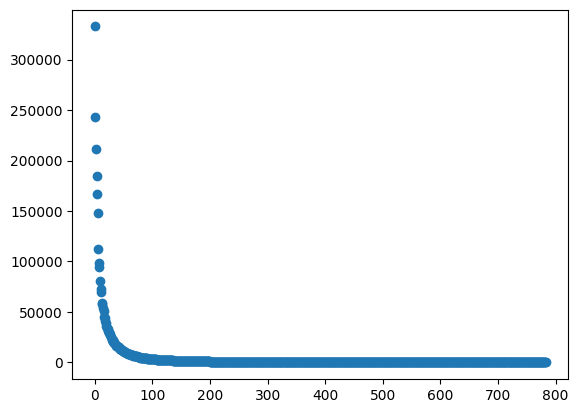

In [5]:

# first method use eigen-decomposition of cov matrix

X_cov = cov(X.T)
eigenvalues, eigenvectors = eig(X_cov) # eigenvalues are not necessarily in decreasing order
V     = real(eigenvectors.T) # eigenvectors should be all real, but it has numerical error
idxs = argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idxs]
V = V[idxs]
scatter(arange(784), eigenvalues) #it shows X is approximately low rank

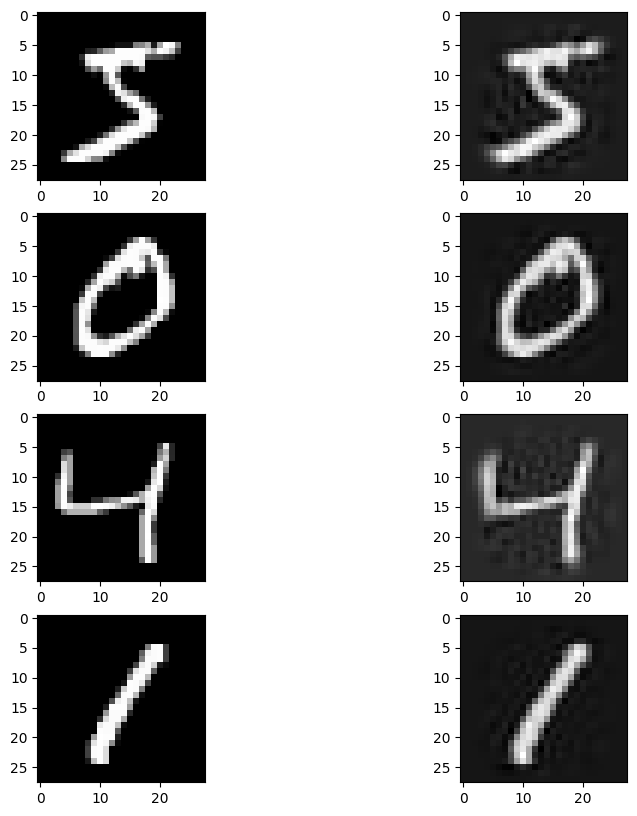

In [6]:
components = V.T[:, 0 : 200] # choose top 200 PCs
projected_X = X.dot(components).dot(components.T) + X_mean # you need to add the mean back to recover the image
projected_Xtr=reshape(projected_X , [60000, 28,28])
fig, axs = plt.subplots(4, 2,figsize=(10,10))
axs = axs.ravel()
for i in range(4):
  axs[2*i].imshow(Xtr[i], cmap=pyplot.get_cmap('gray')) #left one is the original picture
  axs[2*i+1].imshow(projected_Xtr[i], cmap=pyplot.get_cmap('gray')) # right one is the approximated one with top 200 PC.



In [7]:
# second method use SVD
u, s, vh =svd(X, full_matrices=False) #make sure full_matrices is false, you don't want to output 60000 by 60000 matrices.

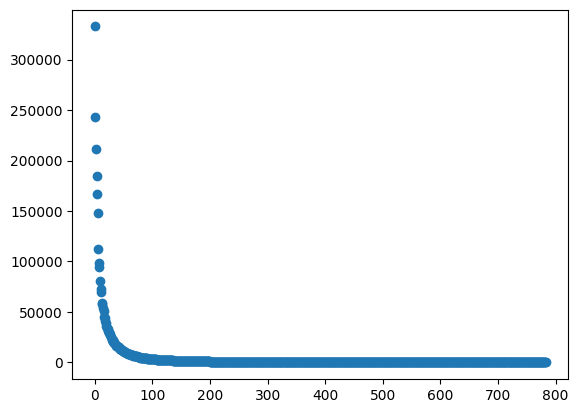

In [8]:
scatter(arange(784), eigenvalues) #it shows X is approximately low rank

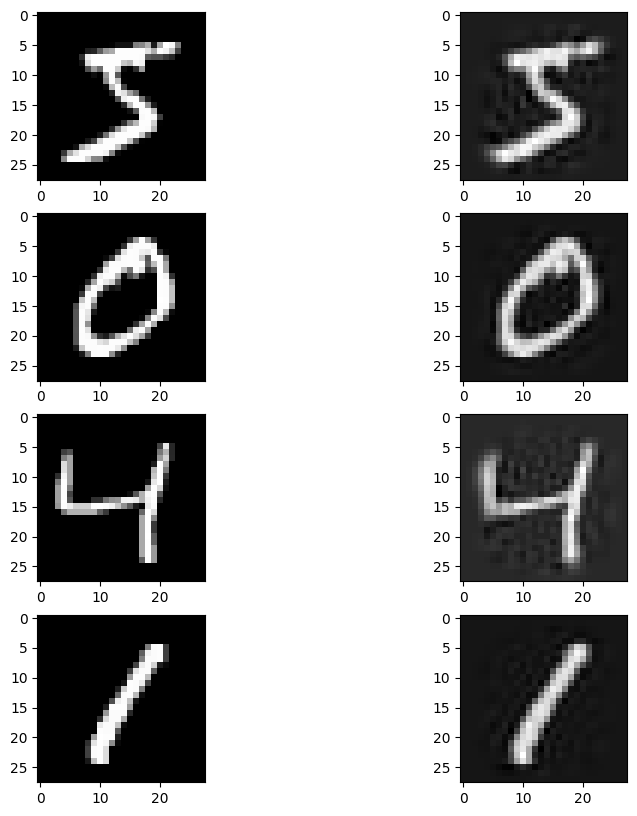

In [9]:
projected_X = dot(u[:,:200]*s[:200],vh[:200,:])+X_mean  # you need to add the mean back to recover the image
projected_Xtr=reshape(projected_X , [60000, 28,28])
fig, axs = plt.subplots(4, 2,figsize=(10,10))
axs = axs.ravel()
for i in range(4):
  axs[2*i].imshow(Xtr[i], cmap=pyplot.get_cmap('gray')) #left one is the original picture
  axs[2*i+1].imshow(projected_Xtr[i], cmap=pyplot.get_cmap('gray')) # right one is the approximated one with top 200 PC.


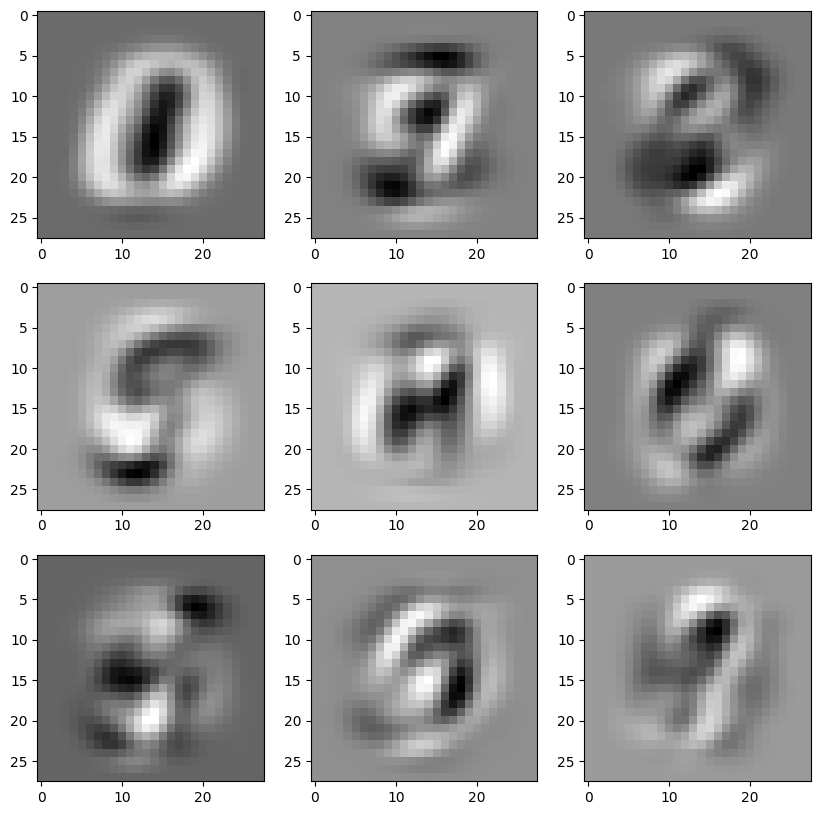

In [10]:
PC = vh[:9,:] # top 9 PCs
PC_image = reshape(PC, [9, 28, 28]) # lets look at top 9 PC look like
fig, axs = plt.subplots(3, 3,figsize=(10,10))
axs = axs.ravel()
for i in range(9):
  axs[i].imshow(PC_image[i], cmap=pyplot.get_cmap('gray'))


Now each MNIST image is 200 dimensional instead of 784 dimensional, without losing lots of information. You can apply all sorts of ML algorithm (classification and clustering) on this 200 dimensional array. This will significantly speed up your learning. This is extremely important when $D$ is very large.

- mathematically there is no difference whether you calculate PCA on the data matrix directly or on its covariance matrix
- the difference is purely due to numerical precision and complexity. Applying SVD directly to the data matrix is numerically more stable than to the covariance matrix

In [11]:
# Let's try SVM Hinge Loss
Xtr                   = train_X[0:60000, :]
train_y_part          = train_y[0:60000]
Ytr                   = zeros(train_y_part.size)
Ytr[train_y_part==9]=1

Xte                   = test_X[0:10000,:]
test_y_part           = test_y[0:10000]
Yte  = zeros(test_y_part.size)
Yte[test_y_part==9]=1

Xtrain  = reshape(Xtr, [60000, 784])
X       = Xtrain
y       = Ytr
y[Ytr==0]=-1

Xtest  = reshape(Xte, [10000, 784])
ytest  = Yte
ytest[Yte==0]=-1

def predict(x, w, w0):
	activation = x.dot(w)+w0
	return activation


def train_weights_hinge(X, y, learning_rate_span,lambda_param, n_iter=1000):
  N,d = X.shape
  w   = np.random.random_sample(d)
  w0  = np.random.random_sample(1)

  for iter in range(n_iter):
    learning_rate = learning_rate_span[iter]
    arr = np.arange(N)
    random.shuffle(arr)
    for i in arr:
          condition = y[i] * (w.dot(X[i,:])+w0) >= 1
          if condition:
            w = w - learning_rate *  w

          else:
            w  = w - learning_rate * (w - lambda_param *y[i] * X[i,:] )
            w0 = w0 - learning_rate * ( -lambda_param * y[i] )

  return w, w0

L=[10**-3, 10**-2]
errors = []
n_iter = 30
n_span = arange(n_iter)
learning_rate_span = 1/((1+ 2*n_span)**2)


In [ ]:
# Hinge loss with dim=784

import time
start_time = time.time()

for l in L:
  w,w0 = train_weights_hinge(X, y, learning_rate_span, l, n_iter)
  ypred = predict(Xtest, w, w0)
  ypred[ypred>=0]=1
  ypred[ypred<=0]=-1
  test_error = norm(ypred-ytest,0)/10000
  errors.append(test_error)
  print('For lambda =',l, 'test error is', test_error)


print("--- %s seconds ---" % (time.time() - start_time))

For lambda = 0.001 test error is 0.0673


In [ ]:
# perform PCA to reduce dim
X_mean              = np.mean(X, axis=0)
X = X - X_mean
u, s, vh =svd(X, full_matrices=False)
V = vh.T
Z = dot(X, V[:,:200] )

Xtest_mean              = np.mean(Xtest, axis=0)
Xtest = Xtest -Xtest_mean
Ztest = dot(Xtest, V[:,:200])

#Now Z, Ztest both only have 200 features.

# Hinge loss with dim=200
start_time = time.time()

for l in L:
  w,w0 = train_weights_hinge(Z, y, learning_rate_span, l, n_iter)
  ypred = predict(Ztest, w, w0)
  ypred[ypred>=0]=1
  ypred[ypred<=0]=-1
  test_error = norm(ypred-ytest,0)/10000
  errors.append(test_error)
  print('For lambda =',l, 'test error is', test_error)


print("--- %s seconds ---" % (time.time() - start_time))

